In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
df = pd.DataFrame(np.random.randint(10,30,50).reshape(10,5))

In [4]:
df

,0,1,2,3,4
0,20,11,14,29,18
1,25,25,26,25,29
2,14,19,23,27,12
3,28,20,15,13,19
4,10,29,13,22,21
5,20,14,18,23,29
6,10,29,15,28,14
7,28,19,11,17,11
8,25,19,21,16,27
9,21,15,19,17,12


In [5]:
df.index

RangeIndex(start=0, stop=10, step=1)

In [17]:
df[0].reset_index()

,index,0
0,0,20
1,1,25
2,2,14
3,3,28
4,4,10
5,5,20
6,6,10
7,7,28
8,8,25
9,9,21


In [24]:
df.reset_index()

,index,0,1,2,3,4
0,0,20,11,14,29,18
1,1,25,25,26,25,29
2,2,14,19,23,27,12
3,3,28,20,15,13,19
4,4,10,29,13,22,21
5,5,20,14,18,23,29
6,6,10,29,15,28,14
7,7,28,19,11,17,11
8,8,25,19,21,16,27
9,9,21,15,19,17,12


In [25]:
df.index = [chr(i) for i in range(65,75)]

In [26]:
df

,0,1,2,3,4
A,20,11,14,29,18
B,25,25,26,25,29
C,14,19,23,27,12
D,28,20,15,13,19
E,10,29,13,22,21
F,20,14,18,23,29
G,10,29,15,28,14
H,28,19,11,17,11
I,25,19,21,16,27
J,21,15,19,17,12


In [27]:
df.columns = ['X','Y','Z','P','Q']

In [28]:
df

,X,Y,Z,P,Q
A,20,11,14,29,18
B,25,25,26,25,29
C,14,19,23,27,12
D,28,20,15,13,19
E,10,29,13,22,21
F,20,14,18,23,29
G,10,29,15,28,14
H,28,19,11,17,11
I,25,19,21,16,27
J,21,15,19,17,12


In [29]:
df.index 

Index(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

In [31]:
newdf = df.reset_index()

In [32]:
newdf

,index,X,Y,Z,P,Q
0,A,20,11,14,29,18
1,B,25,25,26,25,29
2,C,14,19,23,27,12
3,D,28,20,15,13,19
4,E,10,29,13,22,21
5,F,20,14,18,23,29
6,G,10,29,15,28,14
7,H,28,19,11,17,11
8,I,25,19,21,16,27
9,J,21,15,19,17,12


In [33]:
newdf['index']

0    A
1    B
2    C
3    D
4    E
5    F
6    G
7    H
8    I
9    J
Name: index, dtype: object

In [34]:
df.iloc[0]

X    20
Y    11
Z    14
P    29
Q    18
Name: A, dtype: int32

In [35]:
df

,X,Y,Z,P,Q
A,20,11,14,29,18
B,25,25,26,25,29
C,14,19,23,27,12
D,28,20,15,13,19
E,10,29,13,22,21
F,20,14,18,23,29
G,10,29,15,28,14
H,28,19,11,17,11
I,25,19,21,16,27
J,21,15,19,17,12


In [36]:
import seaborn as sns

In [37]:
tip = sns.load_dataset("tips")

In [38]:
tip

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [39]:
tip['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

### Groupby

In [41]:
tip.groupby("time").value_counts()

AttributeError: 'DataFrameGroupBy' object has no attribute 'value_counts'

In [43]:
tip.groupby("time").count()['tip']

time
Lunch      68
Dinner    176
Name: tip, dtype: int64

In [47]:
tip.groupby("sex").sum().drop("size",axis=1)

,total_bill,tip
sex,,
Male,3256.82,485.07
Female,1570.95,246.51


In [48]:
tip['sex'].value_counts()

Male      157
Female     87
Name: sex, dtype: int64

In [52]:
tip.groupby("size").count()

total_bill    244
tip           244
sex           244
smoker        244
day           244
time          244
dtype: int64

In [54]:
tip.groupby("size").mean()

,total_bill,tip
size,,
1,7.242500,1.437500
2,16.448013,2.582308
3,23.277632,3.393158
4,28.613514,4.135405
5,30.068000,4.028000
6,34.830000,5.225000


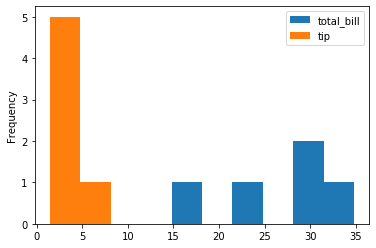

In [55]:
tip.groupby("size").mean().plot(kind='hist')

In [66]:
plt.rcParams["figure.figsize"] = (11,5)

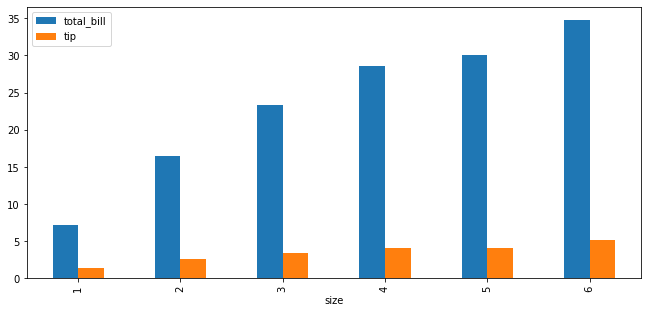

In [67]:
tip.groupby("size").mean().plot(kind='bar')

In [68]:
df = pd.read_csv("matches.csv")

In [69]:
df.columns

Index(['id', 'season', 'city', 'date', 'team1', 'team2', 'toss_winner',
       'toss_decision', 'result', 'dl_applied', 'winner', 'win_by_runs',
       'win_by_wickets', 'player_of_match', 'venue', 'umpire1', 'umpire2',
       'umpire3'],
      dtype='object')

In [71]:
df.groupby("player_of_match").count()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,venue,umpire1,umpire2,umpire3
player_of_match,,,,,,,,,,,,,,,,,
A Chandila,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
A Joseph,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
A Kumble,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
A Mishra,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,11,2
A Nehra,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Washington Sundar,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0
YK Pathan,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,16,0
YS Chahal,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,0


In [72]:
len(df.groupby("city"))

32

In [83]:
df.groupby("city").count()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
city,,,,,,,,,,,,,,,,,
Abu Dhabi,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Ahmedabad,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0
Bangalore,66,66,66,66,66,66,66,66,66,64,66,66,64,66,65,65,0
Bengaluru,14,14,14,14,14,14,14,14,14,13,14,14,13,14,14,14,14
Bloemfontein,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Cape Town,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Centurion,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0
Chandigarh,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0
Chennai,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,9


In [87]:
df.shape

(756, 18)

In [88]:
df.isna().count()

id                 756
season             756
city               756
date               756
team1              756
team2              756
toss_winner        756
toss_decision      756
result             756
dl_applied         756
winner             756
win_by_runs        756
win_by_wickets     756
player_of_match    756
venue              756
umpire1            756
umpire2            756
umpire3            756
dtype: int64

In [92]:
df[df['city'].apply(lambda x : True if str(x).startswith("C") else False)].groupby("city").count()

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
city,,,,,,,,,,,,,,,,,
Cape Town,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0
Centurion,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,0
Chandigarh,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,46,0
Chennai,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,57,9
Cuttack,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0


In [94]:
df.groupby("city").count().sort_values(by="id")

,id,season,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
city,,,,,,,,,,,,,,,,,
Bloemfontein,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,0
Nagpur,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Kimberley,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
East London,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,0
Kanpur,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4,0
Kochi,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,5,0
Raipur,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
Sharjah,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,0
Abu Dhabi,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,7,0


In [98]:
df.groupby("city").count().sort_values(by="id",ascending=False)[:5]['id']

city
Mumbai       101
Kolkata       77
Delhi         74
Bangalore     66
Hyderabad     64
Name: id, dtype: int64

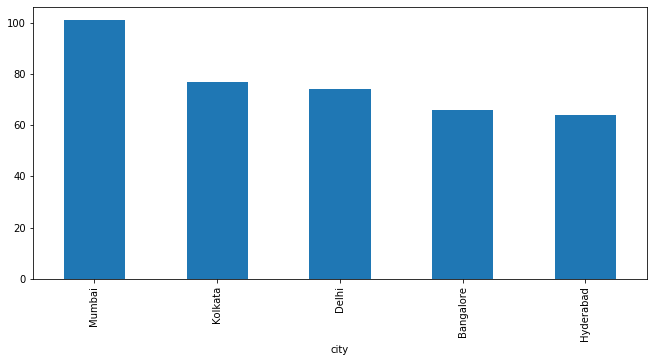

In [99]:
df.groupby("city").count().sort_values(by="id",ascending=False)[:5]['id'].plot(kind='bar')

In [100]:
df.head()

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,2017-04-05,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,2017-04-06,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,2017-04-07,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,2017-04-08,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,2017-04-08,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [103]:
df['season'].value_counts().sort_values()

2009    57
2008    58
2017    59
2015    59
2019    60
2018    60
2016    60
2014    60
2010    60
2011    73
2012    74
2013    76
Name: season, dtype: int64

In [104]:
df['season'].value_counts().sort_index()

2008    58
2009    57
2010    60
2011    73
2012    74
2013    76
2014    60
2015    59
2016    60
2017    59
2018    60
2019    60
Name: season, dtype: int64

In [105]:
df['date'].dtype

dtype('O')

In [107]:
df['date'] = pd.to_datetime(df['date'])

In [108]:
df['date'].dtype

dtype('<M8[ns]')

In [109]:
df['date']

0     2017-04-05
1     2017-04-06
2     2017-04-07
3     2017-04-08
4     2017-04-08
         ...    
751   2019-05-05
752   2019-07-05
753   2019-08-05
754   2019-10-05
755   2019-12-05
Name: date, Length: 756, dtype: datetime64[ns]

In [111]:
df['date']

0     2017-04-05
1     2017-04-06
2     2017-04-07
3     2017-04-08
4     2017-04-08
         ...    
751   2019-05-05
752   2019-07-05
753   2019-08-05
754   2019-10-05
755   2019-12-05
Name: date, Length: 756, dtype: datetime64[ns]

In [117]:
df['city'].value_counts(sort=True,ascending=True)

Abu Dhabi           7
Ahmedabad          12
Bangalore          66
Bengaluru          14
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         46
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mohali             10
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah             6
Visakhapatnam      13
Name: city, dtype: int64

In [116]:
df.index

RangeIndex(start=0, stop=756, step=1)

In [118]:
df['city'].value_counts().sort_index()

Abu Dhabi           7
Ahmedabad          12
Bangalore          66
Bengaluru          14
Bloemfontein        2
Cape Town           7
Centurion          12
Chandigarh         46
Chennai            57
Cuttack             7
Delhi              74
Dharamsala          9
Durban             15
East London         3
Hyderabad          64
Indore              9
Jaipur             47
Johannesburg        8
Kanpur              4
Kimberley           3
Kochi               5
Kolkata            77
Mohali             10
Mumbai            101
Nagpur              3
Port Elizabeth      7
Pune               38
Raipur              6
Rajkot             10
Ranchi              7
Sharjah             6
Visakhapatnam      13
Name: city, dtype: int64

In [123]:
tip.sort_values("tip",ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
67,3.07,1.00,Female,Yes,Sat,Dinner,1


In [124]:
tip.sort_values(['tip','total_bill'],ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
23,39.42,7.58,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
141,34.30,6.70,Male,No,Thur,Lunch,6
...,...,...,...,...,...,...,...
0,16.99,1.01,Female,No,Sun,Dinner,2
236,12.60,1.00,Male,Yes,Sat,Dinner,2
111,7.25,1.00,Female,No,Sat,Dinner,1
92,5.75,1.00,Female,Yes,Fri,Dinner,2


In [136]:
tip['tip'].value_counts()

2.00    33
3.00    23
4.00    12
5.00    10
2.50    10
        ..
2.83     1
1.58     1
3.71     1
3.35     1
2.18     1
Name: tip, Length: 123, dtype: int64

In [143]:
tip[(tip['tip'] == 5.00) | (tip['tip'] == 2.00)].sort_values(['tip','total_bill'])

,total_bill,tip,sex,smoker,day,time,size
149,7.51,2.0,Male,No,Thur,Lunch,2
6,8.77,2.0,Male,No,Sun,Dinner,2
226,10.09,2.0,Female,Yes,Fri,Lunch,2
136,10.33,2.0,Female,No,Thur,Lunch,2
196,10.34,2.0,Male,Yes,Thur,Lunch,2
169,10.63,2.0,Female,Yes,Sat,Dinner,2
128,11.38,2.0,Female,No,Thur,Lunch,2
133,12.26,2.0,Female,No,Thur,Lunch,2
27,12.69,2.0,Male,No,Sat,Dinner,2
198,13.00,2.0,Female,Yes,Thur,Lunch,2


In [148]:
tip[(tip['tip'] == 2.00) | (tip['tip'] == 1.00)].sort_values(['tip','total_bill'])

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1
92,5.75,1.0,Female,Yes,Fri,Dinner,2
111,7.25,1.0,Female,No,Sat,Dinner,1
236,12.60,1.0,Male,Yes,Sat,Dinner,2
149,7.51,2.0,Male,No,Thur,Lunch,2
6,8.77,2.0,Male,No,Sun,Dinner,2
226,10.09,2.0,Female,Yes,Fri,Lunch,2
136,10.33,2.0,Female,No,Thur,Lunch,2
196,10.34,2.0,Male,Yes,Thur,Lunch,2
169,10.63,2.0,Female,Yes,Sat,Dinner,2


In [145]:
tip['total_bill'].sort_values()

67      3.07
92      5.75
111     7.25
172     7.25
149     7.51
       ...  
182    45.35
156    48.17
59     48.27
212    48.33
170    50.81
Name: total_bill, Length: 244, dtype: float64

In [146]:
tip[tip['total_bill'] == 3.07]

,total_bill,tip,sex,smoker,day,time,size
67,3.07,1.0,Female,Yes,Sat,Dinner,1


In [150]:
df1 = pd.DataFrame(np.random.randint(5,10,25).reshape(5,5))
df2 = pd.DataFrame(np.random.randint(15,20,25).reshape(5,5))

In [151]:
df1

,0,1,2,3,4
0,9,9,8,9,6
1,8,5,5,7,5
2,9,7,7,5,5
3,5,5,9,8,7
4,5,5,7,7,7


In [152]:
df2

,0,1,2,3,4
0,17,16,15,17,16
1,19,15,19,17,18
2,17,18,15,18,18
3,17,15,18,16,17
4,17,19,17,19,16


In [154]:
newdf = pd.concat((df1,df2))

In [155]:
newdf

,0,1,2,3,4
0,9,9,8,9,6
1,8,5,5,7,5
2,9,7,7,5,5
3,5,5,9,8,7
4,5,5,7,7,7
0,17,16,15,17,16
1,19,15,19,17,18
2,17,18,15,18,18
3,17,15,18,16,17
4,17,19,17,19,16


In [157]:
newdf.index

Int64Index([0, 1, 2, 3, 4, 0, 1, 2, 3, 4], dtype='int64')

In [158]:
newdf.iloc[0]

0    9
1    9
2    8
3    9
4    6
Name: 0, dtype: int32

In [159]:
newdf

,0,1,2,3,4
0,9,9,8,9,6
1,8,5,5,7,5
2,9,7,7,5,5
3,5,5,9,8,7
4,5,5,7,7,7
0,17,16,15,17,16
1,19,15,19,17,18
2,17,18,15,18,18
3,17,15,18,16,17
4,17,19,17,19,16


In [160]:
newdf.iloc[3]

0    5
1    5
2    9
3    8
4    7
Name: 3, dtype: int32

In [162]:
len(newdf)

10

In [166]:
newdf.index = range(0,10)

In [167]:
newdf

,0,1,2,3,4
0,9,9,8,9,6
1,8,5,5,7,5
2,9,7,7,5,5
3,5,5,9,8,7
4,5,5,7,7,7
5,17,16,15,17,16
6,19,15,19,17,18
7,17,18,15,18,18
8,17,15,18,16,17
9,17,19,17,19,16


In [169]:
newdf.iloc[0]

0    9
1    9
2    8
3    9
4    6
Name: 0, dtype: int32

## Merge

    It is like join in database

In [170]:
from random import choice

In [176]:
df1 = pd.DataFrame({"id" : np.arange(1,11),
                   "name" : [choice(["simran","nehal","padmani","asyuhi","rohan"]) for i in range(10)],
                   "maths" : np.random.randint(50,90,10),
                   "science" : np.random.randint(50,90,10)})

In [177]:
df1

,id,name,maths,science
0,1,simran,67,72
1,2,simran,89,87
2,3,simran,63,87
3,4,asyuhi,89,67
4,5,asyuhi,70,79
5,6,nehal,65,70
6,7,simran,51,65
7,8,nehal,73,63
8,9,asyuhi,63,50
9,10,simran,57,63


In [178]:
df2 = pd.DataFrame({"id" : np.arange(1,11),
                   "name" : [choice(["simran","nehal","padmani","asyuhi","rohan"]) for i in range(10)],
                   "maths" : np.random.randint(50,90,10),
                   "science" : np.random.randint(50,90,10)})

In [179]:
df2

,id,name,maths,science
0,1,asyuhi,82,56
1,2,simran,58,71
2,3,nehal,60,76
3,4,nehal,68,89
4,5,rohan,84,84
5,6,simran,71,59
6,7,asyuhi,87,65
7,8,padmani,78,52
8,9,nehal,88,59
9,10,simran,61,54


In [182]:
newdf = pd.merge(df1,df2,on="id")

In [184]:
newdf.iloc[0]

id                1
name_x       simran
maths_x          67
science_x        72
name_y       asyuhi
maths_y          82
science_y        56
Name: 0, dtype: object

In [187]:
pd.merge(df1,df2,on="name")

,id_x,name,maths_x,science_x,id_y,maths_y,science_y
0,1,simran,67,72,2,58,71
1,1,simran,67,72,6,71,59
2,1,simran,67,72,10,61,54
3,2,simran,89,87,2,58,71
4,2,simran,89,87,6,71,59
5,2,simran,89,87,10,61,54
6,3,simran,63,87,2,58,71
7,3,simran,63,87,6,71,59
8,3,simran,63,87,10,61,54
9,7,simran,51,65,2,58,71


In [186]:
newdf

,id,name_x,maths_x,science_x,name_y,maths_y,science_y
0,1,simran,67,72,asyuhi,82,56
1,2,simran,89,87,simran,58,71
2,3,simran,63,87,nehal,60,76
3,4,asyuhi,89,67,nehal,68,89
4,5,asyuhi,70,79,rohan,84,84
5,6,nehal,65,70,simran,71,59
6,7,simran,51,65,asyuhi,87,65
7,8,nehal,73,63,padmani,78,52
8,9,asyuhi,63,50,nehal,88,59
9,10,simran,57,63,simran,61,54


In [189]:
df1['name'].value_counts()

simran    5
asyuhi    3
nehal     2
Name: name, dtype: int64

In [190]:
df2['name'].value_counts()

nehal      3
simran     3
asyuhi     2
padmani    1
rohan      1
Name: name, dtype: int64

In [191]:
newdf

,id,name_x,maths_x,science_x,name_y,maths_y,science_y
0,1,simran,67,72,asyuhi,82,56
1,2,simran,89,87,simran,58,71
2,3,simran,63,87,nehal,60,76
3,4,asyuhi,89,67,nehal,68,89
4,5,asyuhi,70,79,rohan,84,84
5,6,nehal,65,70,simran,71,59
6,7,simran,51,65,asyuhi,87,65
7,8,nehal,73,63,padmani,78,52
8,9,asyuhi,63,50,nehal,88,59
9,10,simran,57,63,simran,61,54
